### 1. Import Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2. Read the file

In [95]:
df=pd.read_csv("supermarket_sales.csv")

### 3. Data Preprocessing

In [96]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

##### 3.1 Dropping few columns

In [98]:
df=df.drop('Branch', axis=True)

In [99]:
df=df.drop('Time', axis=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     1000 non-null   object 
 1   Customer type            1000 non-null   object 
 2   Gender                   1000 non-null   object 
 3   Product line             1000 non-null   object 
 4   Unit price               1000 non-null   float64
 5   Quantity                 1000 non-null   int64  
 6   Tax 5%                   1000 non-null   float64
 7   Total                    1000 non-null   float64
 8   Date                     1000 non-null   object 
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

##### 3.2 Converting date time values

In [101]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   object        
 1   Customer type            1000 non-null   object        
 2   Gender                   1000 non-null   object        
 3   Product line             1000 non-null   object        
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Payment                  1000 non-null   object        
 10  cogs                     1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

##### 3.3 Check the  missing values

In [103]:
df.isnull().sum()

City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   object        
 1   Customer type            1000 non-null   object        
 2   Gender                   1000 non-null   object        
 3   Product line             1000 non-null   object        
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Payment                  1000 non-null   object        
 10  cogs                     1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

##### 3.4 Encoding Categorical Columns

In [105]:
le=LabelEncoder()
df["City"]=le.fit_transform(df["City"])
df["Customer type"]=le.fit_transform(df["Customer type"])
df["Gender"]=le.fit_transform(df["Gender"])
df["Product line"]=le.fit_transform(df["Product line"])
df["Payment"]=le.fit_transform(df["Payment"])
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
0,2,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,2,522.83,4.761905,26.1415,9.1
1,1,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,0,76.40,4.761905,3.8200,9.6
2,2,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,1,324.31,4.761905,16.2155,7.4
3,2,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,2,465.76,4.761905,23.2880,8.4
4,2,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,3,40.35,1,2.0175,42.3675,2019-01-29,2,40.35,4.761905,2.0175,6.2
996,0,1,0,4,97.38,10,48.6900,1022.4900,2019-03-02,2,973.80,4.761905,48.6900,4.4
997,2,0,1,2,31.84,1,1.5920,33.4320,2019-02-09,0,31.84,4.761905,1.5920,7.7
998,2,1,1,4,65.82,1,3.2910,69.1110,2019-02-22,0,65.82,4.761905,3.2910,4.1


##### 3.5 Outlier Detection

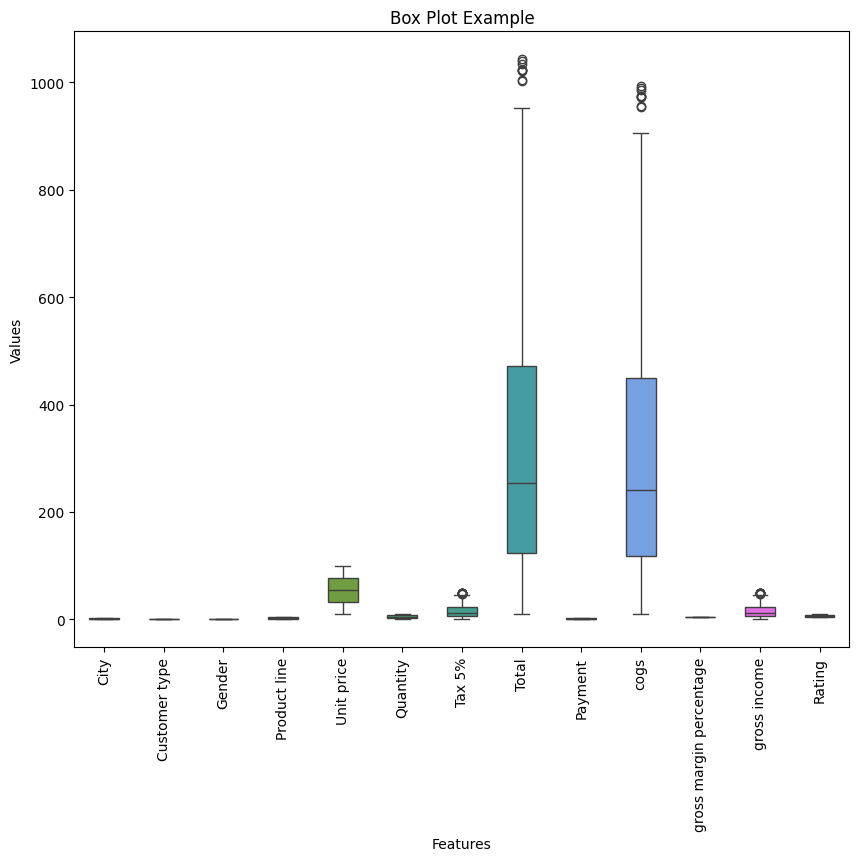

In [106]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

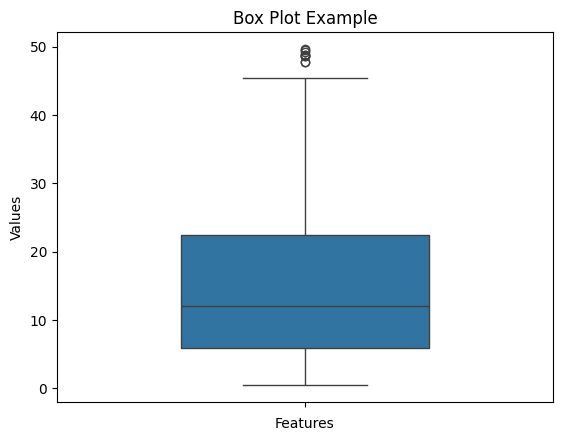

In [107]:
sns.boxplot(data=df['Tax 5%'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [108]:
df['Tax 5%'] = np.sqrt(df['Tax 5%'])

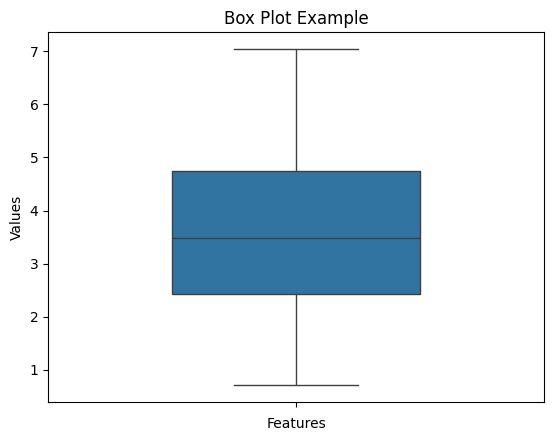

In [109]:
sns.boxplot(data=df['Tax 5%'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

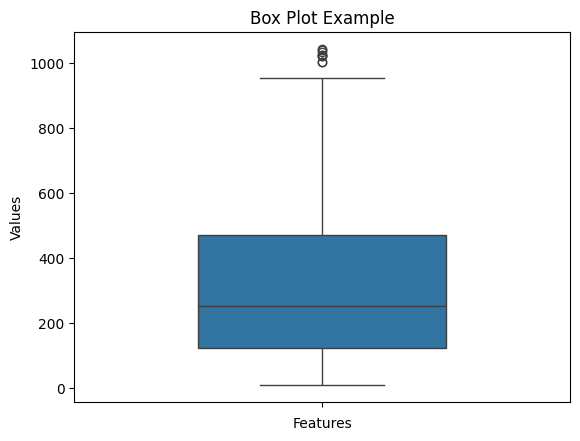

In [110]:
sns.boxplot(data=df['Total'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [111]:
df['Total'] = np.sqrt(df['Total'])

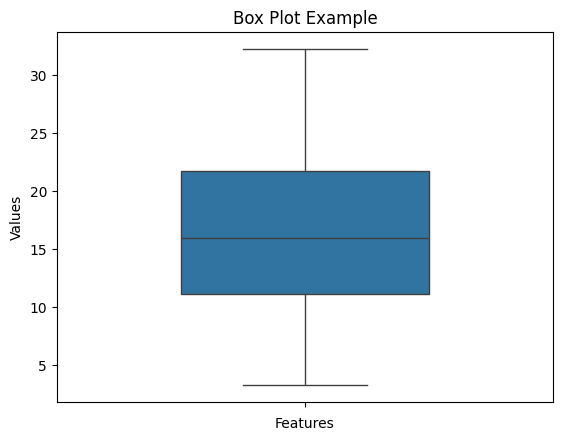

In [112]:
sns.boxplot(data=df['Total'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

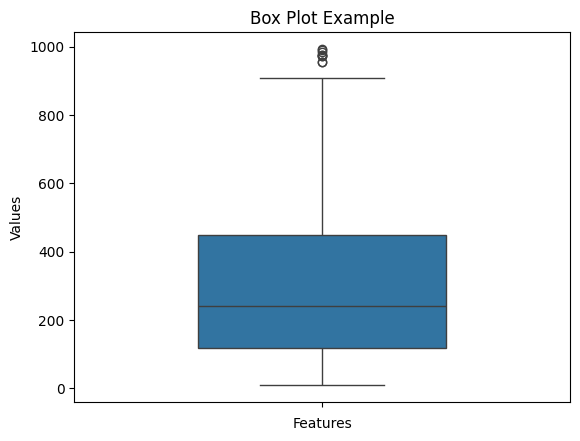

In [113]:
sns.boxplot(data=df['cogs'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [114]:
df['cogs'] = np.sqrt(df['cogs'])

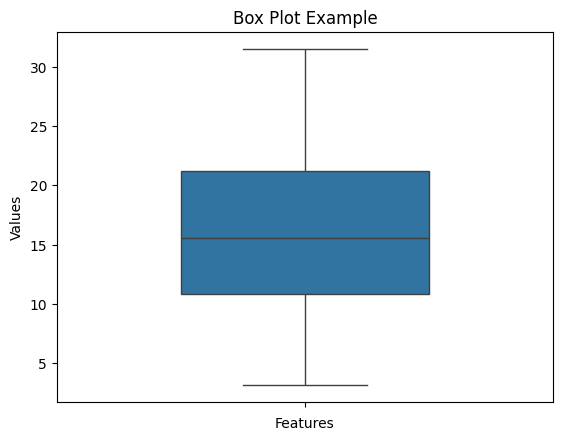

In [115]:
sns.boxplot(data=df['cogs'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [116]:
df['gross income'] = np.sqrt(df['gross income'])

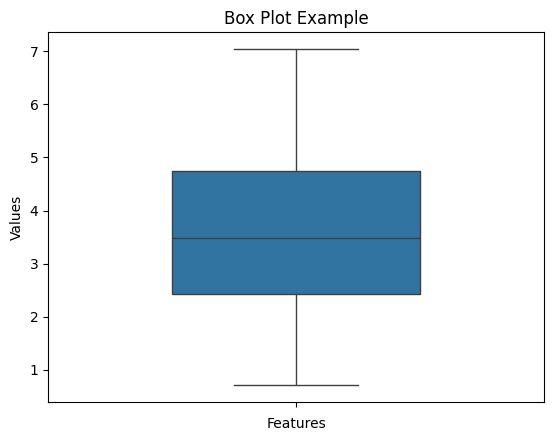

In [117]:
sns.boxplot(data=df['gross income'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [118]:
df['Rating'] = np.sqrt(df['Rating'])

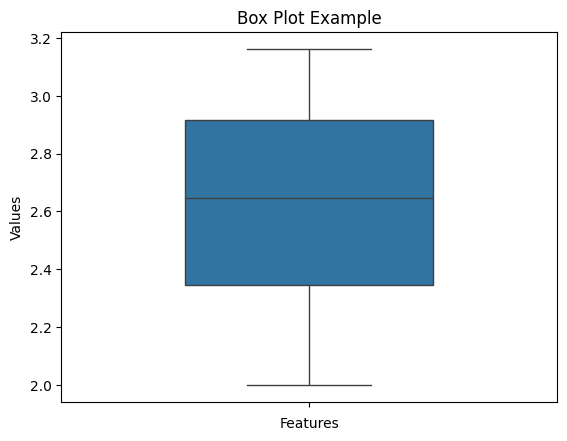

In [119]:
sns.boxplot(data=df['Rating'], width=0.5)
plt.title('Box Plot Example')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   int32         
 1   Customer type            1000 non-null   int32         
 2   Gender                   1000 non-null   int32         
 3   Product line             1000 non-null   int32         
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Payment                  1000 non-null   int32         
 10  cogs                     1000 non-null   float64       
 11  gross margin percentage  1000 non-null   float64       
 12  gross income             1000 non-n

In [121]:
df = df.drop(['Date'], axis=1)
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,2,0,0,3,74.69,7,5.112876,23.430141,2,22.865476,4.761905,5.112876,3.016621
1,1,1,0,0,15.28,5,1.954482,8.956562,0,8.740709,4.761905,1.954482,3.098387
2,2,1,1,4,46.33,7,4.026847,18.453333,1,18.008609,4.761905,4.026847,2.720294
3,2,0,1,3,58.22,8,4.825764,22.114430,2,21.581474,4.761905,4.825764,2.898275
4,2,1,1,5,86.31,7,5.496226,25.186872,2,24.579870,4.761905,5.496226,2.302173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,3,40.35,1,1.420387,6.509032,2,6.352165,4.761905,1.420387,2.489980
996,0,1,0,4,97.38,10,6.977822,31.976398,2,31.205769,4.761905,6.977822,2.097618
997,2,0,1,2,31.84,1,1.261745,5.782041,0,5.642694,4.761905,1.261745,2.774887
998,2,1,1,4,65.82,1,1.814111,8.313303,0,8.112953,4.761905,1.814111,2.024846


### 4. Model building

In [122]:
X=df.drop(['Rating'], axis=1)
y=df.Rating

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

##### 4.1 Decision Tree Regressor

In [123]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred=dtr.predict(x_test)
y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')


Mean Absolute Error: 0.41
Mean Squared Error: 0.24


##### 4.2 Linear Regression

In [124]:
l1 = LinearRegression()
l1.fit(x_train, y_train)

y_pred=l1.predict(x_test)
y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Mean Absolute Error: 0.29
Mean Squared Error: 0.11


##### 4.3 Random Forest Regressor

In [125]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

y_pred=rfr.predict(x_test)
y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Mean Absolute Error: 0.30
Mean Squared Error: 0.13


##### 4.4 XGBoost Regressor

In [126]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

y_pred=xgb.predict(x_test)
y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')


Mean Absolute Error: 0.32
Mean Squared Error: 0.15


##### 4.5 Ridge Regressor Model

In [127]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)


y_pred = ridge_reg.predict(x_test)
y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Mean Absolute Error: 0.29
Mean Squared Error: 0.11


##### 4.6 Bagging Regressor Model

In [128]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(x_train, y_train)

y_pred = bagging_reg.predict(x_test)
y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Mean Absolute Error: 0.31
Mean Squared Error: 0.14


##### 4.7 Deep Neural Networks

In [129]:
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

In [130]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [131]:
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=2)

Epoch 1/10
35/35 - 1s - loss: 1.6339 - val_loss: 1.6225 - 693ms/epoch - 20ms/step
Epoch 2/10
35/35 - 0s - loss: 1.6262 - val_loss: 1.6224 - 63ms/epoch - 2ms/step
Epoch 3/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 84ms/epoch - 2ms/step
Epoch 4/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 78ms/epoch - 2ms/step
Epoch 5/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 79ms/epoch - 2ms/step
Epoch 6/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 63ms/epoch - 2ms/step
Epoch 7/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 78ms/epoch - 2ms/step
Epoch 8/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 78ms/epoch - 2ms/step
Epoch 9/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 79ms/epoch - 2ms/step
Epoch 10/10
35/35 - 0s - loss: 1.6261 - val_loss: 1.6223 - 98ms/epoch - 3ms/step


In [132]:
predictions = model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


In [133]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error on Test Set: {mae:.2f}')

Mean Absolute Error on Test Set: 1.61


In [134]:
mae = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse:.2f}')

Mean Squared Error on Test Set: 0.14
